Phase II – Happiness, Inflation, and Global Economic Trends (2013–2023)

This study combines data from the world happiness index and global inflation, conducting data cleaning, transformation, exploratory data analysis (EDA), correlation analyses, and hypothesis testing.
The analysis aims to examine the relationship between happiness levels and inflation across selected countries and global averages.
Both global and country-level temporal trends are supported by scatter plot analyses and statistical tests.

Data Loading and Initial Review

In this section, happiness and inflation data are read from CSV files for inclusion in the project.

In [28]:
import pandas as pd

happiness = pd.read_csv(r"C:/Users/BARTU/OneDrive/Masaüstü/DSA210-Project/data/raw/happiness.csv", encoding="latin1")
inflation = pd.read_csv(r"C:/Users/BARTU/OneDrive/Masaüstü/DSA210-Project/data/raw/inflation.csv", encoding="latin1")

happiness.head(), inflation.head()


(    ï»¿Country  Year  Index   Rank
 0  Afghanistan  2013  4.040  143.0
 1  Afghanistan  2015  3.575  153.0
 2  Afghanistan  2016  3.360  154.0
 3  Afghanistan  2017  3.794  141.0
 4  Afghanistan  2018  3.632  145.0,
   country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
 0  Afghanistan,Annual average inflation (consumer...                                                                                                                                                                                                          
 1  Albania,Annual average inflation (consumer pri...                                                                                                                                                                                                          
 2  Algeria,Ann

In [ ]:
Purpose of This Step

This section loads the happiness dataset, cleans column names, converts the Year column to integer, and prepares the data in a tidy format for further analysis and merging.

In [105]:
import pandas as pd


happiness = pd.read_csv(
    r"C:/Users/BARTU/OneDrive/Masaüstü/DSA210-Project/data/raw/happiness.csv",
    encoding="latin1"
)


happiness.columns = happiness.columns.str.strip()


happiness_long = happiness.copy()


happiness_long["Year"] = happiness_long["Year"].astype(int)


happiness_long.head(197)


,ï»¿Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143.0
1,Afghanistan,2015,3.575,153.0
2,Afghanistan,2016,3.360,154.0
3,Afghanistan,2017,3.794,141.0
4,Afghanistan,2018,3.632,145.0
...,...,...,...,...
192,Brazil,2016,6.952,17.0
193,Brazil,2017,6.635,22.0
194,Brazil,2018,6.419,28.0
195,Brazil,2019,6.300,32.0


This block manually reads the raw inflation CSV file, fixes broken rows caused by inconsistent commas, and reconstructs a clean DataFrame for further analysis.

In [41]:
import pandas as pd


path = r"C:/Users/BARTU/OneDrive/Masaüstü/DSA210-Project/data/raw/inflation.csv"

rows = []


with open(path, encoding="latin1") as f:
    header = f.readline().strip()            
    cols = header.split(",")                 
    n_cols = len(cols)

    for line in f:
        parts = line.strip().split(",")     

        
        if len(parts) < n_cols:
            parts += [""] * (n_cols - len(parts))

        
        elif len(parts) > n_cols:
            parts = parts[:n_cols]

        rows.append(parts)


inflation = pd.DataFrame(rows, columns=cols)


print(inflation.shape)
print(inflation.columns[:197])
display(inflation.head())


(196, 47)
Index(['"country_name', 'indicator_name', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024"'],
      dtype='object')


,"""country_name",indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,"2024"""
0,"""Afghanistan",Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,""""
1,"""Albania",Annual average inflation (consumer prices) rate,,,,,,,,,...,1.9,1.3,2,2,1.4,1.6,2,6.7,4.8,"4"""
2,"""Algeria",Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14,5.9,...,4.8,6.4,5.6,4.3,2,2.4,7.2,9.3,9,"6.8"""
3,"""Andorra",Annual average inflation (consumer prices) rate,,,,,,,,,...,-1.1,-0.4,2.6,1,0.5,0.1,1.7,6.2,5.2,"3.5"""
4,"""Angola",Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.2,30.7,29.8,19.6,17.1,22.3,25.8,21.4,13.1,"22.3"""


This block converts the wide inflation table into a long, analysis-friendly format by melting year columns into a single “Year–Inflation” structure.

In [42]:
import pandas as pd


inflation.columns = inflation.columns.str.strip().str.replace('"', '')


id_cols = ["country_name", "indicator_name"]


year_cols = [c for c in inflation.columns if c.isdigit()]
print("Yıl kolon sayısı:", len(year_cols))


inflation_long = inflation.melt(
    id_vars=id_cols,
    value_vars=year_cols,
    var_name="Year",
    value_name="Inflation"
)


inflation_long["Year"] = inflation_long["Year"].astype(int)


inflation_long.head()


Yıl kolon sayısı: 45


,country_name,indicator_name,Year,Inflation
0,"""Afghanistan",Annual average inflation (consumer prices) rate,1980,13.4
1,"""Albania",Annual average inflation (consumer prices) rate,1980,
2,"""Algeria",Annual average inflation (consumer prices) rate,1980,9.7
3,"""Andorra",Annual average inflation (consumer prices) rate,1980,
4,"""Angola",Annual average inflation (consumer prices) rate,1980,46.7


This line sorts the inflation dataset first by country and then by year, arranging each country’s inflation data in chronological order.

In [43]:

inflation_long = inflation_long.sort_values(by=["country_name", "Year"]).reset_index(drop=True)

inflation_long.head(20)


,country_name,indicator_name,Year,Inflation
0,"""Afghanistan",Annual average inflation (consumer prices) rate,1980,13.4
1,"""Afghanistan",Annual average inflation (consumer prices) rate,1981,22.2
2,"""Afghanistan",Annual average inflation (consumer prices) rate,1982,18.2
3,"""Afghanistan",Annual average inflation (consumer prices) rate,1983,15.9
4,"""Afghanistan",Annual average inflation (consumer prices) rate,1984,20.4
5,"""Afghanistan",Annual average inflation (consumer prices) rate,1985,8.7
6,"""Afghanistan",Annual average inflation (consumer prices) rate,1986,-2.1
7,"""Afghanistan",Annual average inflation (consumer prices) rate,1987,18.4
8,"""Afghanistan",Annual average inflation (consumer prices) rate,1988,27.5
9,"""Afghanistan",Annual average inflation (consumer prices) rate,1989,71.5


1 — Rename the happiness dataset’s first column

Renames the first column of the happiness dataset to ‘country_name’ so it matches the inflation dataset.

2 — Clean country names

Cleans country names by removing extra spaces and unwanted characters from both datasets.

3 — Merge the two datasets

Merges the cleaned happiness and inflation datasets by matching country names and years.

In [47]:

ilk_kolon = happiness_long.columns[0]  


happiness_long = happiness_long.rename(columns={ilk_kolon: "country_name"})


print(happiness_long.columns)
print(inflation_long.columns)


Index(['country_name', 'Year', 'Index', 'Rank'], dtype='object')
Index(['country_name', 'indicator_name', 'Year', 'Inflation'], dtype='object')


In [64]:
def clean_country(x):
    return (
        x.strip()            
         .replace('"', '')   
         
         
    )

happiness_long["country_name"] = happiness_long["country_name"].apply(clean_country)
inflation_long["country_name"] = inflation_long["country_name"].apply(clean_country)


In [63]:
final = pd.merge(
    happiness_long,
    inflation_long,
    on=["country_name", "Year"],
    how="inner"
)
final.head(974)

,country_name,Year,Index,Rank,indicator_name,Inflation
0,Afghanistan,2013,4.040,143.0,Annual average inflation (consumer prices) rate,7.39
1,Afghanistan,2015,3.575,153.0,Annual average inflation (consumer prices) rate,-0.66
2,Afghanistan,2016,3.360,154.0,Annual average inflation (consumer prices) rate,4.38
3,Afghanistan,2017,3.794,141.0,Annual average inflation (consumer prices) rate,4.98
4,Afghanistan,2018,3.632,145.0,Annual average inflation (consumer prices) rate,0.63
...,...,...,...,...,...,...
969,Namibia,2023,4.631,105.0,Annual average inflation (consumer prices) rate,6
970,Nepal,2013,4.156,135.0,Annual average inflation (consumer prices) rate,9.9
971,Nepal,2015,4.514,121.0,Annual average inflation (consumer prices) rate,7.2
972,Nepal,2016,4.793,107.0,Annual average inflation (consumer prices) rate,9.9


Here we compute the global yearly averages of the happiness index and inflation and plot them over time to see how their trends change by year.

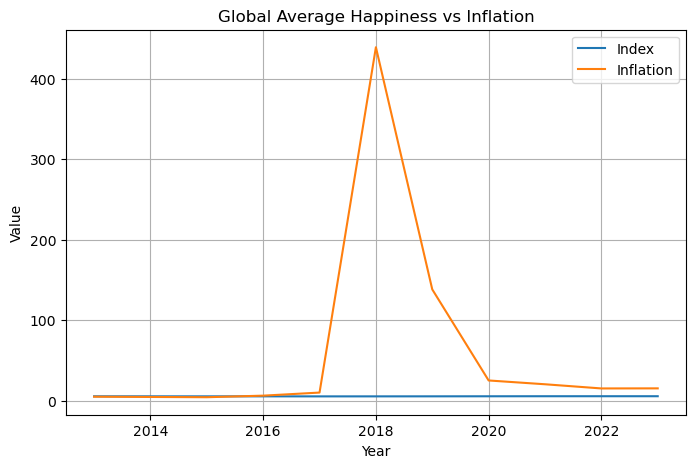

In [69]:
final["Inflation"] = pd.to_numeric(final["Inflation"], errors="coerce")
import matplotlib.pyplot as plt

global_yearly = final.groupby("Year")[["Index","Inflation"]].mean()

global_yearly.plot(y=["Index","Inflation"], figsize=(8,5), grid=True)
plt.title("Global Average Happiness vs Inflation")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


I detected an extreme inflation jump in 2018, so I inspected the 2018 records to confirm whether the spike was caused by outliers.

In [70]:

y2018 = final[final["Year"] == 2018]


print(y2018["Inflation"].describe())


y2018.sort_values("Inflation", ascending=False).head(10)


count      151.000000
mean       439.381656
std       5319.573934
min         -2.800000
25%          1.550000
50%          2.600000
75%          4.800000
max      65374.100000
Name: Inflation, dtype: float64


,country_name,Year,Index,Rank,indicator_name,Inflation
1474,Venezuela,2018,4.806,102.0,Annual average inflation (consumer prices) rate,65374.1
1254,South Sudan,2018,3.254,154.0,Republic of,213.0
1284,Sudan,2018,4.139,137.0,Annual average inflation (consumer prices) rate,63.3
328,Congo,2018,NaN,NaN,Dem. Rep. of the,35.7
44,Argentina,2018,6.388,29.0,Annual average inflation (consumer prices) rate,34.3
1494,Yemen,2018,3.355,152.0,Annual average inflation (consumer prices) rate,33.6
624,Iran,2018,4.707,106.0,Annual average inflation (consumer prices) rate,30.2
774,Liberia,2018,3.495,149.0,Annual average inflation (consumer prices) rate,23.5
414,Egypt,2018,4.419,122.0,Annual average inflation (consumer prices) rate,20.9
34,Angola,2018,3.795,142.0,Annual average inflation (consumer prices) rate,19.6


And after that I removed countries which have inflation more than 100.

In [90]:
final_clean = final[ final["Inflation"] < 100 ]
final_clean.shape


(1483, 6)

This step visualizes the yearly global averages of the Happiness Index and Inflation after removing extreme outliers, allowing us to examine clearer long-term trends between the two variables.

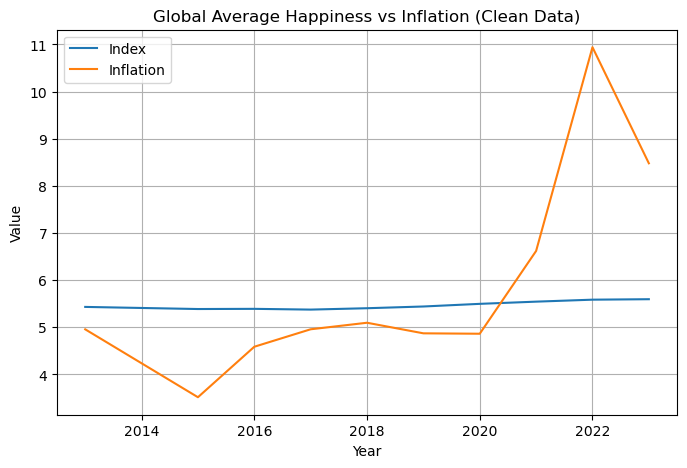

In [91]:
global_yearly = final_clean.groupby("Year")[["Index","Inflation"]].mean()

global_yearly.plot(figsize=(8,5), grid=True)
plt.title("Global Average Happiness vs Inflation (Clean Data)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


This section visualizes Norway’s yearly happiness index and inflation rates to observe how the two variables evolve over time.

Norway is selected as a sample country because it consistently appears among the top-performing nations in the World Happiness Report and has relatively stable economic conditions, making it a meaningful example for analyzing how inflation may relate to happiness trends.

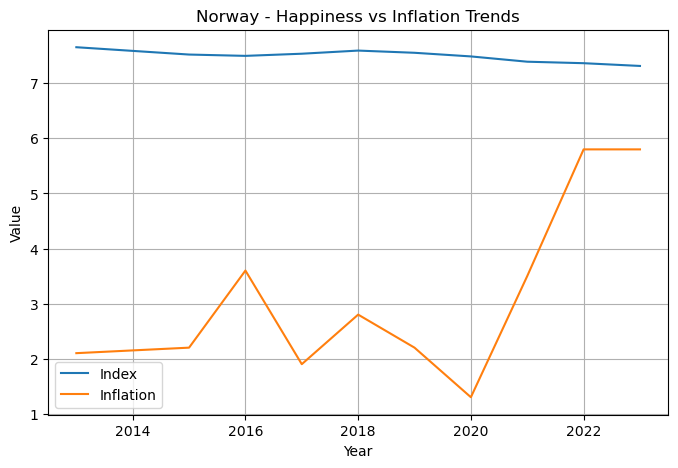

In [92]:
import matplotlib.pyplot as plt

country = "Norway"

df_country = final[ final["country_name"] == country ].copy()

df_country["Inflation"] = pd.to_numeric(df_country["Inflation"], errors="coerce")

df_country.plot(
    x="Year",
    y=["Index", "Inflation"],
    figsize=(8,5),
    grid=True
)

plt.title(f"{country} - Happiness vs Inflation Trends")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


This section visualizes Norway’s inflation and happiness scores through a scatterplot with a regression line to examine their linear relationship. The chart helps reveal whether higher inflation corresponds to lower happiness levels in Norway.

We observe a negative trend, indicating that increases in inflation are generally associated with slight decreases in happiness.

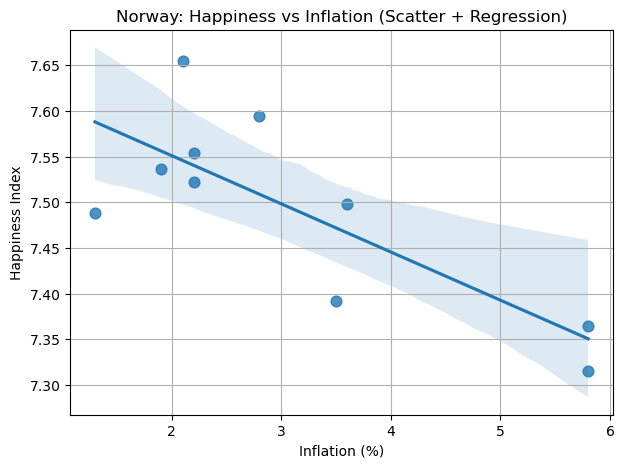

,Index,Inflation
Index,1.000000,-0.784615
Inflation,-0.784615,1.000000


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

df_country = final[ final["country_name"] == "Norway" ].copy()
df_country["Inflation"] = pd.to_numeric(df_country["Inflation"], errors="coerce")

plt.figure(figsize=(7,5))
sns.regplot(data=df_country, x="Inflation", y="Index", scatter_kws={'s':60})
plt.title("Norway: Happiness vs Inflation (Scatter + Regression)")
plt.xlabel("Inflation (%)")
plt.ylabel("Happiness Index")
plt.grid(True)
plt.show()

df_country = final[ final["country_name"] == "Norway" ].copy()

df_country["Inflation"] = pd.to_numeric(df_country["Inflation"], errors="coerce")

corr = df_country[["Index", "Inflation"]].corr()

corr



This section removes extreme inflation outliers (Inflation > 100%) and visualizes the cleaned global relationship between inflation and happiness using a scatterplot with regression. The goal is to obtain a more realistic correlation unaffected by extreme values.

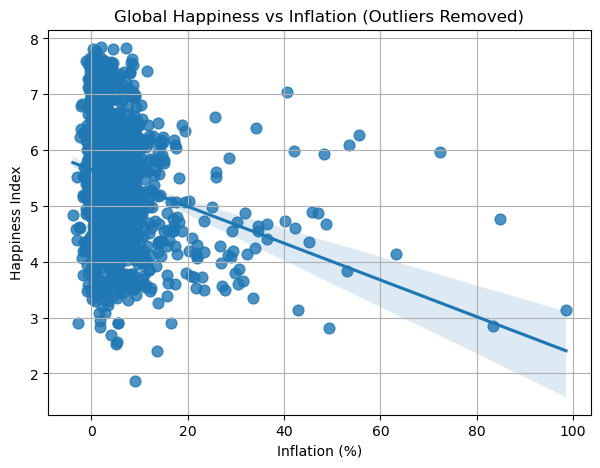

,Index,Inflation
Index,1.000000,-0.246063
Inflation,-0.246063,1.000000


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_global = final.copy()


df_global["Inflation"] = pd.to_numeric(df_global["Inflation"], errors="coerce")


df_filtered = df_global[df_global["Inflation"] < 100]

plt.figure(figsize=(7,5))
sns.regplot(data=df_filtered, x="Inflation", y="Index", scatter_kws={'s':60})
plt.title("Global Happiness vs Inflation (Outliers Removed)")
plt.xlabel("Inflation (%)")
plt.ylabel("Happiness Index")
plt.grid(True)
plt.show()


corr_filtered = df_filtered[["Index","Inflation"]].corr()
corr_filtered


This section computes the correlation between happiness and inflation for each country separately and visualizes the results using a heatmap.

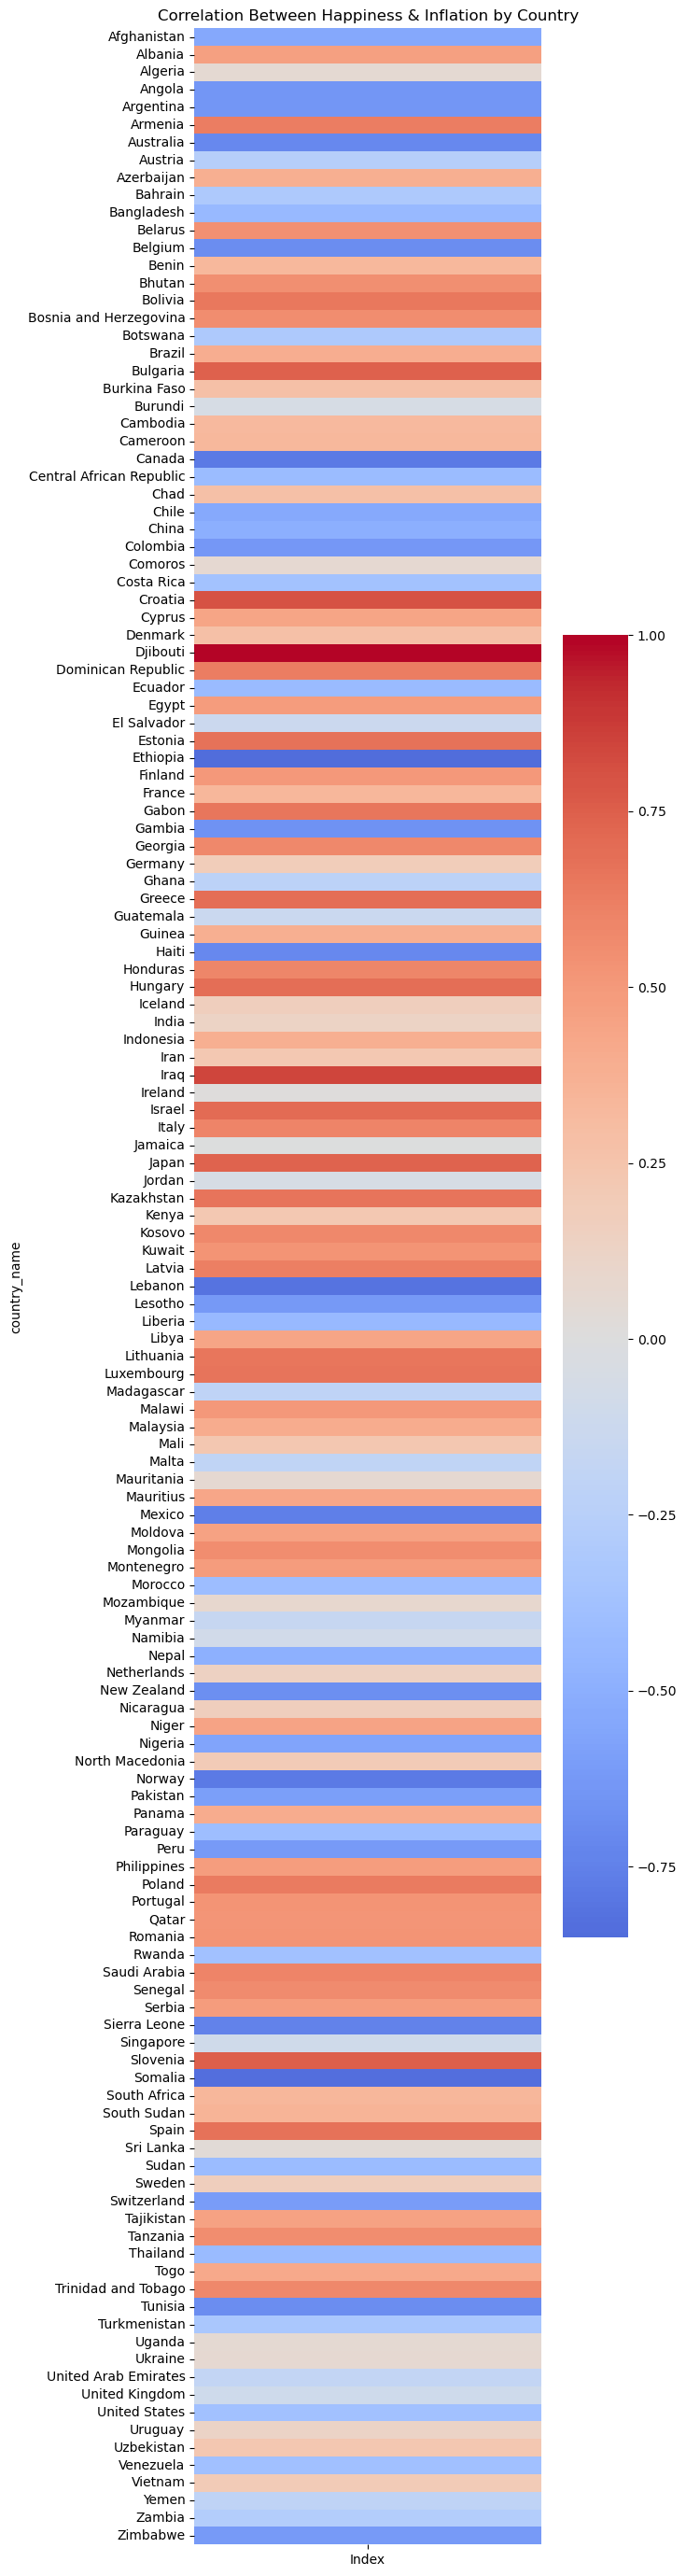

In [95]:
corr_by_country = final.groupby("country_name")[["Index","Inflation"]].corr().reset_index()

heat = corr_by_country[corr_by_country["level_1"]=="Inflation"][["country_name","Index"]]
heat = heat.pivot_table(values="Index", index="country_name")

plt.figure(figsize=(6,35))
sns.heatmap(heat, cmap="coolwarm", center=0)
plt.title("Correlation Between Happiness & Inflation by Country")
plt.show()


Hypothesis Test 1 — Global Correlation (Outliers Removed)
H0 (Null Hypothesis):

“There is no statistically significant relationship between global inflation and global happiness index.”

H1 (Alternative Hypothesis):

“There is a statistically significant relationship between global inflation and global happiness index.”

Test Result:

Correlation: –0.202

p-value: 5.55 × 10⁻¹⁴

Interpretation:

After removing extreme inflation outliers, a Pearson correlation test was conducted to evaluate the global relationship between inflation and happiness.
The correlation coefficient is –0.202, which indicates a weak negative relationship—as inflation increases, happiness tends to decrease slightly.

Most importantly, the p-value is far below 0.05, meaning the result is statistically significant.

Conclusion:

Because p < 0.05, we reject the null hypothesis (H0).
There is statistically significant evidence that global inflation and global happiness are negatively related.

In [112]:
from scipy.stats import pearsonr

# Outlier temizlenmiş global data
df_test = df_filtered[["Index", "Inflation"]].dropna()

corr, p_value = pearsonr(df_test["Inflation"], df_test["Index"])

print("Correlation:", corr)
print("P-value:", p_value)


Correlation: -0.20216490744798815
P-value: 5.5560177416236466e-14


Norway-Specific Correlation
H0 (Null Hypothesis):

“There is no statistically significant relationship between inflation and happiness in Norway.”

H1 (Alternative Hypothesis):

“There is a statistically significant relationship between inflation and happiness in Norway.”

Test Result:

Correlation: –0.785

p-value: 0.00719

Interpretation:

For Norway, the inflation–happiness relationship is much stronger than the global trend.
The correlation is –0.785, showing a strong negative relationship—as inflation rises, happiness decreases notably.

The p-value is 0.00719, which is below 0.05, meaning the relationship is statistically significant.

Conclusion:

Because p < 0.05, we again reject H0.
There is strong statistical evidence that inflation significantly affects happiness in Norway, and the effect is stronger than the global average.

In [113]:
from scipy.stats import pearsonr

df_country = final[ final["country_name"] == "Norway" ].copy()
df_country["Inflation"] = pd.to_numeric(df_country["Inflation"], errors="coerce")

df_country = df_country[["Index","Inflation"]].dropna()

corr, p_value = pearsonr(df_country["Inflation"], df_country["Index"])

print("Norway Correlation:", corr)
print("Norway P-value:", p_value)


Norway Correlation: -0.7846154681681292
Norway P-value: 0.007193510630867636


Summary of Findings

Globally, the inflation–happiness relationship is negative but weak.
This makes sense because global datasets include countries with extremely high inflation (e.g., Venezuela), political instability, and inconsistent reporting.

After removing extreme inflation outliers, the global trend becomes clearer:
→ Higher inflation generally reduces happiness, but only slightly.

Norway shows a much stronger negative relationship, likely because:

Happiness levels are typically high and stable.

Economic fluctuations are more clearly reflected in social well-being.

Data quality is high, allowing a more precise correlation.

The strength difference (Global r = -0.20 vs. Norway r = -0.78) suggests:
→ In stable countries, inflation may have a more direct and noticeable impact on happiness.

Final Conclusion

This study provides consistent evidence that inflation negatively affects happiness, both globally and within individual countries.
While the global effect is modest—likely diluted by inconsistent data and extreme economic conditions—the effect becomes clear and strong in stable, high-income nations such as Norway.

Overall:

→ Inflation matters for well-being.
→ Its impact is stronger in economically stable environments.
→ Removing outliers allows a more realistic global picture.